# Part 1

In [227]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import json
import urllib
import re

In [349]:
# Read html file from github repository and upload into dataframe named html_df
html = pd.read_html("https://raw.githubusercontent.com/brianlivian/AIM-5001/master/books.html")
html_df = html[0]
html_df

,Title,Unnamed: 1,Authors,Unnamed: 3,Attributes,Unnamed: 5
0,American Kingpin,NaN,Nick Bilton,NaN,"True Crime, Exciting to read",NaN
1,In Cold Blood,NaN,Truman Capote,NaN,"True Crime, Well written, Famous book",NaN
2,Unvelievable,NaN,"T. Christian Miller, Ken Armstrong",NaN,"True Crime, Made into Netflix film",NaN


In [332]:
# Read json file form github repository into variable called json by use of pandas
json = pd.read_json("https://raw.githubusercontent.com/brianlivian/AIM-5001/master/books.json")
json

,Title,Authors,Attributes
0,American Kingpin,Nick Boltin,"True Crime, Exciting to read"
1,In Cold Blood,Truman Capote,"True Crime, Well written, Famous book"
2,Unbelievable,"T. Christian Miller, Ken Armstrong","True Crime, Made into Netflix film"


# Part 2

In [48]:
url = 'https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty'
katz = requests.get(url)

In [78]:
# Create a beautiful soup class of 'katz'
soup = BeautifulSoup(katz.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Start VWO Async Smartcode -->
  <script type="text/javascript">
   window._vwo_code = win

In [333]:
# Create a variable faculty which locates the div with class = 'body'
faculty = BeautifulSoup.find_all(soup, class_ = 'body' )
# Make faculty into string for regex operations
faculty = str(faculty)
print(faculty)

[<div class="body"><h5>Paul Russo, Ph.D. Vice Provost and Dean</h5>
<p>Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&amp;Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-

In [334]:
# Regex returns instructor name and title (between <h5> in html)
instructor1 = []
instructor1 = re.findall('<h5>.*</h5>', faculty)
instructor = str(instructor1)
print(instructor)
print('')

#Refine instructor list/string to extract only names
name1 = re.findall('<h5>.*?\w+\s\w+,', instructor)
name1 = str(name1)
print(name1)
print('')
name = re.findall('[A-Z][a-z]+\\s[A-Z][a-z]+', name1)
print(name)
print('')

# Regex which extracts titles from instructor 1 list/string
title1 = []
for i in instructor1:
    title1.append(re.findall(',.*</h5>', i))
print(title1)
print('')


    


['<h5>Paul Russo, Ph.D. Vice Provost and Dean</h5>', '<h5>Andy Catlin, Program Director, Data Analytics and Visualization</h5>', '<h5>Wonjun Lee, Assistant Professor, Artificial Intelligence</h5>', '<h5><a id="_e9ugeq1gjau7" name="_e9ugeq1gjau7"></a>Sergey Fogelson, Instructor</h5>', '<h5>Lawrence Fulton, Instructor</h5>', '<h5>Jeff Nieman, Instructor</h5>']

['<h5>Paul Russo,', '<h5>Andy Catlin,', '<h5>Wonjun Lee,', '<h5><a id="_e9ugeq1gjau7" name="_e9ugeq1gjau7"></a>Sergey Fogelson,', '<h5>Lawrence Fulton,', '<h5>Jeff Nieman,']

['Paul Russo', 'Andy Catlin', 'Wonjun Lee', 'Sergey Fogelson', 'Lawrence Fulton', 'Jeff Nieman']

[[', Ph.D. Vice Provost and Dean</h5>'], [', Program Director, Data Analytics and Visualization</h5>'], [', Assistant Professor, Artificial Intelligence</h5>'], [', Instructor</h5>'], [', Instructor</h5>'], [', Instructor</h5>']]



In [338]:
body = []
# Regex to extract all string between <p> and </p>
# Each instructor has 2 body paragraphs, and there are 6 instructors
# Thus the return for body has 12 elements
body = re.findall('<p>.*</p>', faculty)
print(body)
print('')
print(len(body))
print('')

bio = []
background = []
# Create 2 lists which separates the bio from background of each faculty
for i in body:
    # If i is even, append bio list
    if (body.index(i) %2) == 0:
        bio.append(body[body.index(i)])
    #if i is odd, append background list
    elif (body.index(i) % 2) == 1:
        background.append(body[body.index(i)])
print(bio)
print('')
print(background)
print('')
print(len(bio))
print('')
print(len(background))
# Note that lengths of bio and background are now 6 each (12 divided by 2)

['<p>Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&amp;Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M award to create the CUNY Center for Big Data.</p>', 

In [339]:
# Create a list of lists called data with elements defined above
data = [name, title1, bio, background]
# Input into dataframe
faculty_info = pd.DataFrame(data)
# Take transpose of dataframe, so columns are Name, Title, Bio, Background
faculty_info = faculty_info.T
# Name columns
faculty_info.columns = ['Name', 'Title', 'Bio', 'Background']
faculty_info

,Name,Title,Bio,Background
0,Paul Russo,"[, Ph.D. Vice Provost and Dean</h5>]","<p>Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&amp;Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M award to create the CUNY Center for Big Data.</p>","<p>Teaches graduate courses in Social Computing, Digital Media, Information Systems, Technology Entrepreneurship, Organizational Behavior, and thesis supervision.</p>"
1,Andy Catlin,"[, Program Director, Data Analytics and Visualization</h5>]","<p>Data scientist and data system developer with expertise in financial instrument pricing and forecasting using weighted Black Scholes Merton model as well as incorporating yield curve analysis into emerging markets products. Recent projects focus on real time market feeds and server-based cascading triggers as well as migrating client-server systems into web and cloud hosted solutions. Previous projects focused on incorporating artificial intelligence and neural networks in specialized applications; C++ financial libraries; security authentication bottleneck correction; patient-days forecasting model using Box Jenkins; production replication architectures; and multi-phase commit and log-shipping architectures. Founder of multiple tech startups, including the Hudson Technology Group (acquired by Incepta), which served major clients including Fidelity Investments; Smart Money; Donaldson, Lufkin and Jenrette (DLJ); Manufacturers Hanover Trust; National Football League; and The Wall Street Journal.</p>","<p>Teaches graduate courses in Analytics Programming, Recommendation Systems, Regression Modeling, Network Analysis, Natural Language Processing, and Neural Networks.</p>"
2,Wonjun Lee,"[, Assistant Professor, Artificial Intelligence</h5>]","<p><a id=""_gjdgxs"" name=""_gjdgxs""></a>Recent research focuses on designing AI-based analytics platforms that provide intelligent analysis capability across disciplines. Currently developing knowledge-based response systems for information and communication systems (ICS) inspired by human immunology. Developing AI analytics platforms in collaboration with researchers from NOAA, University of Texas at San Antonio, Auburn University, and University of Georgia. Previous research at University of Texas at San Antonio applied deep learning models, including recurrent and convolutional neural networks, to existing research areas, such as the analysis of malign network traffic and privacy issues of Internet of Things (IoT) home devices. As a principal researcher at Samsung, focused on cybersecurity in mobile app penetration and cloud computing assessment.</p>","<p>Teaches graduate courses in Security Analytics, Neural Network and Deep Learning, Information Security, and System Programming.</p>"
3,Sergey Fogelson,"[, Instructor</h5>]","<p>Data scientist and data product architect with expertise in media and advertising-related pricing, scheduling, and forecasting, and in large-scale anonymized identity models. Major projects have included building petabyte-scale data warehouses for media asset management and consumption analysis use-cases; fault-tolerant data products utilizing human-in-the-loop mac

# Part 3

In [340]:
# Access the url data by requests library
# Note the syntax of the url. '/viewed/30.json?api' returns the most viewed media from the past 30 days
r1 = requests.get('https://api.nytimes.com/svc/mostpopular/v2/viewed/30.json?api-key=7OUH4ZiAX3banwBwIDZEWkrbg3G9dwjO')
# Convert to json
r1 = r1.json()
r1


{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/5c4506e8-e8c6-5e88-a165-3541e93bea08',
   'url': 'https://www.nytimes.com/2021/02/18/us/politics/ted-cruz-storm-cancun.html',
   'id': 100000007612071,
   'asset_id': 100000007612071,
   'source': 'New York Times',
   'published_date': '2021-02-18',
   'updated': '2021-02-19 19:21:19',
   'section': 'U.S.',
   'subsection': 'Politics',
   'nytdsection': 'u.s.',
   'adx_keywords': 'United States Politics and Government;Travel and Vacations;Power Failures and Blackouts;Cruz, Ted;Cruz, Heidi Nelson;Texas;Cancun (Mexico)',
   'column': None,
   'byline': 'By Shane Goldmacher and Nicholas Fandos',
   'type': 'Article',
   'title': 'Ted Cruz’s Cancún Trip: Family Texts Detail His Political Blunder',
   'abstract': 'The Texas senator faced fierce blowback for fleeing his state as a disaster unfolded. Text messages sent by his wife revea

In [318]:
# Algorithm to find results from json object
# Return results for most the 20 most viewed articles in the past 30 days
# Returns results for title, date published, url, and section
title = []
for i in range(20):
    title.append(r1['results'][i]['title'])
print(title)
print('')

date = []
for i in range(20):
    date.append(r1['results'][i]['published_date'])
print(date)
print('')

url = []
for i in range(20):
    url.append(r1['results'][i]['url'])
print(url)
print('')

section = []
for i in range(20):
    section.append(r1['results'][i]['section'])
print(section)
print('')

['Ted Cruz’s Cancún Trip: Family Texts Detail His Political Blunder', 'His Lights Stayed on During Texas’ Storm. Now He Owes $16,752.', '6 Dr. Seuss Books Will No Longer Be Published Over Offensive Images', 'Death, Through a Nurse’s Eyes', 'Cuomo Accused of Unwanted Advance at a Wedding: ‘Can I Kiss You?’', '‘I Just Didn’t Want to Be Alive Anymore’: Meghan Says Life as Royal Made Her Suicidal', 'Divided Senate Passes Biden’s Pandemic Aid Plan', '8 People Killed in Atlanta-Area Massage Parlor Shootings', 'Cuomo Is Accused of Sexual Harassment by a 2nd Former Aide', 'This Is How You Get the Best Scrambled Eggs', '‘I’ve Never Seen Anything Like This’: Chaos Strikes Global Shipping', 'Inside a Battle Over Race, Class and Power at Smith College', 'Teen Vogue Editor Resigns After Fury Over Racist Tweets', 'Hunting for a Leftover Vaccine? This Site Will Match You With a Clinic.', 'The Lies Hollywood Tells About Little Girls', 'MacKenzie Scott, a Philanthropist and Ex-Wife of Jeff Bezos, Remar

In [341]:
# Create list of lists called data with elements from lists defined in cell above
data = [title, date, url, section]
# Input data into dataframe
df = pd.DataFrame(data)
# Take transpose of dataframe so columns are Title, Date Published, URL, Section
df = df.T
# Name columns
df.columns = ['Title', 'Date Published', 'URL', 'Section']
df

,Title,Date Published,URL,Section
0,Ted Cruz’s Cancún Trip: Family Texts Detail His Political Blunder,2021-02-18,https://www.nytimes.com/2021/02/18/us/politics/ted-cruz-storm-cancun.html,U.S.
1,"His Lights Stayed on During Texas’ Storm. Now He Owes $16,752.",2021-02-20,https://www.nytimes.com/2021/02/20/us/texas-storm-electric-bills.html,U.S.
2,6 Dr. Seuss Books Will No Longer Be Published Over Offensive Images,2021-03-02,https://www.nytimes.com/2021/03/02/books/dr-seuss-mulberry-street.html,Books
3,"Death, Through a Nurse’s Eyes",2021-02-24,https://www.nytimes.com/2021/02/24/opinion/covid-icu-nurses-arizona.html,Opinion
4,Cuomo Accused of Unwanted Advance at a Wedding: ‘Can I Kiss You?’,2021-03-01,https://www.nytimes.com/2021/03/01/nyregion/cuomo-harassment-anna-ruch.html,New York
5,‘I Just Didn’t Want to Be Alive Anymore’: Meghan Says Life as Royal Made Her Suicidal,2021-03-07,https://www.nytimes.com/2021/03/07/world/europe/oprah-interview-harry-meghan.html,World
6,Divided Senate Passes Biden’s Pandemic Aid Plan,2021-03-06,https://www.nytimes.com/2021/03/06/us/politics/biden-stimulus-plan.html,U.S.
7,8 People Killed in Atlanta-Area Massage Parlor Shootings,2021-03-16,https://www.nytimes.com/2021/03/16/us/atlanta-shootings-massage-parlor.html,U.S.
8,Cuomo Is Accused of Sexual Harassment by a 2nd Former Aide,2021-02-27,https://www.nytimes.com/2021/02/27/nyregion/cuomo-charlotte-bennett-sexual-harassment.html,New York
9,This Is How You Get the Best Scrambled Eggs,2021-02-19,https://www.nytimes.com/2021/02/19/dining/perfect-scrambled-eggs.html,Food


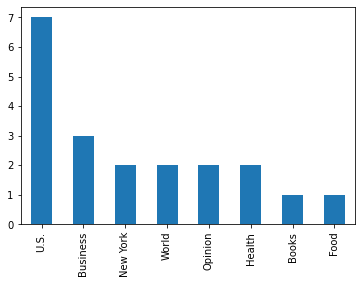

In [342]:
# Bar graph for analytics of 'Section' column
df['Section'].value_counts().plot.bar();

I have created a dataframe from the new york times API of most viewed media. The API accesses the 20 most viewed media from the pats 30 days (this report was written on 3/21/2021). The dataframe lists the title, date published, url, and section in high to low order. Thus, "Ted Cruz’s Cancún Trip: Family Texts Detail His Political Blunder" was the most viewed media in the New York Times in the past 30 days. I have done a basic analysis of the section column of this dataframe. Based on the bar graph above, the most popular section in the past 30 days was "U.S.", with a 7 mediatypes having a section categorized as "U.S.". 